**1 - Consult GPU, or CPU, Disponibility**

In [4]:
import tensorflow as tf

config = tf.compat.v1.ConfigProto(
    gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.8)
    # device_count = {'GPU': 1}
)
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)
tf.keras.backend.set_session(session)

print("\nUsing GPU ==", tf.test.is_gpu_available())


Using GPU == True


**2 - Import Libraries**

In [5]:
from IPython.display import clear_output
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
import keras
from PIL import Image
from keras import backend as tf
from scipy import misc
import random
import matplotlib.pyplot as plt
import pandas as pd
import csv
import itertools

from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.xception import Xception
from keras.applications.mobilenet import MobileNet
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.nasnet import NASNetMobile
from keras.applications.nasnet import NASNetLarge
from keras.applications.densenet import DenseNet121
from keras.applications.densenet import DenseNet169
from keras.applications.densenet import DenseNet201

from keras.applications.inception_resnet_v2 import preprocess_input as ppi_inceptionresnet_v2
from keras.applications.vgg16 import preprocess_input as ppi_vgg16
from keras.applications.vgg19 import preprocess_input as ppi_vgg19
from keras.applications.xception import preprocess_input as ppi_xception
from keras.applications.resnet50 import preprocess_input as ppi_resnet50
from keras.applications.inception_v3 import preprocess_input as ppi_inception_v3
from keras.applications.mobilenet import preprocess_input as ppi_mobilenet
from keras.applications.nasnet import preprocess_input as ppi_nasnet
from keras.applications.densenet import preprocess_input as ppi_densenet

from keras.preprocessing import image
from keras.layers import Input

from keras.utils import np_utils


#np.set_printoptions(threshold=np.nan)
keras.backend.backend()

from keras.applications.vgg16 import decode_predictions
import keras.backend as K
from keras.preprocessing import image

import time
current_milli_time = lambda: int(round(time.time() * 1000))

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

from scipy.stats import randint as sp_randint

from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.metrics import *

def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]

# accuracy, precision, sensitivity, specificity, f1_score, process_time
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from imblearn.metrics import specificity_score
from imblearn.metrics import sensitivity_score

**BÔNUS: FINE-TUNING ON VGG16 BY KERAS**

In [6]:
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

vgg_conv.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
    
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)
    

<keras.engine.input_layer.InputLayer object at 0x7f8cfe666860> False
<keras.layers.convolutional.Conv2D object at 0x7f8cfa9146d8> False
<keras.layers.convolutional.Conv2D object at 0x7f8cfa914828> False
<keras.layers.pooling.MaxPooling2D object at 0x7f8cfa9059e8> False
<keras.layers.convolutional.Conv2D object at 0x7f8cfa905d68> False
<keras.layers.convolutional.Conv2D object at 0x7f8cf80b0710> False
<keras.layers.pooling.MaxPooling2D object at 0x7f8cf805f8d0> False
<keras.layers.convolutional.Conv2D object at 0x7f8cf805f7b8> False
<keras.layers.convolutional.Conv2D object at 0x7f8cf808e518> False
<keras.layers.convolutional.Conv2D object at 0x7f8cf803d0f0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f8cf8053cf8> False
<keras.layers.convolutional.Conv2D object at 0x7f8cf8053be0> False
<keras.layers.convolutional.Conv2D object at 0x7f8ce3fef470> False
<keras.layers.convolutional.Conv2D object at 0x7f8ce3f889b0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f8ce3fb78d0>

In [8]:
from keras import models
from keras.models import Model
from keras import layers
from keras.layers import Dense, GlobalAveragePooling2D
from keras import optimizers
 
# Create the model
base_model = models.Sequential()
 
# Add the vgg convolutional base model
base_model.add(vgg_conv)
 
x = base_model.output
x = GlobalAveragePooling2D()(x)

# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)

# and a logistic layer -- let's say we have 3 classes
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16_input (InputLayer)     (None, 224, 224, 3)       0         
_________________________________________________________________
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2050      
Total params: 15,242,050
Trainable params: 7,606,786
Non-trainable params: 7,635,264
_________________________________________________________________


In [9]:
from keras.optimizers import SGD

# Compile the model
# model.compile(loss='categorical_crossentropy',
#               optimizer=SGD(lr=0.0001),
#               metrics=['acc'])
model.compile(loss='binary_crossentropy',
              optimizer=SGD(lr=0.0001),
              metrics=['acc'])

In [10]:
from sklearn.model_selection import train_test_split
path = "./dataset/DDSM_ROI/mass&B2&B5_augmentation/FINE_TUNING"

X = []
y = []
# img_class2 = 0
for classe in list([0,1]):
    folderPath = path+os.sep+str(classe)
    for subdir, dirs, files in os.walk(folderPath):
        for i, name in enumerate(files):
            img = cv2.imread(subdir+os.sep+name)
            img = cv2.resize(img, (224,224))
            X.append(img)

            img_class = classe

    #         img_class = int(name.split("_")[0])
    #         if img_class == 1:
    #             img_class2 = 0
    #         if img_class == 2:
    #             img_class2 = 0
    #         if img_class == 5:
    #             img_class2 = 1    
            y.append(img_class)
        
X = np.asarray(X)
y = np.asarray(y)

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

print(X_train.shape, y_train.shape)
X_train = ppi_vgg16(X_train)

print(X_train.shape)

(6663, 224, 224, 3) (6663,)
(5330, 224, 224, 3) (5330,)
(5330, 224, 224, 3)


In [11]:
#AM: Adjust label to One-Hot encoding
from keras.utils.np_utils import to_categorical

#AM: Transform values 1 to 000000001, 2 to 000000010, 3 to 000000100, etc
y_train_categ = to_categorical(y_train) 
y_test_categ = to_categorical(y_test)

In [12]:
print(y_train[0], y_train_categ[0])

1 [0. 1.]


In [13]:
%%time
plotfit = model.fit(X_train, y_train_categ,
                    epochs=200,
                    batch_size=40,
                    shuffle=True,
                    validation_data=(X_test, y_test_categ))
print(model.evaluate(X_train, y_train_categ, batch_size=40, verbose=0))

Instructions for updating:
Use tf.cast instead.
Train on 5330 samples, validate on 1333 samples
Epoch 1/200
5330/5330 [==============================] - 307s 58ms/step - loss: 0.2884 - acc: 0.9066 - val_loss: 0.2501 - val_acc: 0.9310
Epoch 2/200
5330/5330 [==============================] - 286s 54ms/step - loss: 0.2352 - acc: 0.9295 - val_loss: 0.2514 - val_acc: 0.9295
Epoch 3/200
5330/5330 [==============================] - 285s 53ms/step - loss: 0.2279 - acc: 0.9304 - val_loss: 0.2454 - val_acc: 0.9310
Epoch 4/200
5330/5330 [==============================] - 285s 53ms/step - loss: 0.2231 - acc: 0.9306 - val_loss: 0.2419 - val_acc: 0.9317
Epoch 5/200
5330/5330 [==============================] - 285s 53ms/step - loss: 0.2189 - acc: 0.9315 - val_loss: 0.2410 - val_acc: 0.9310
Epoch 6/200
5330/5330 [==============================] - 285s 53ms/step - loss: 0.2156 - acc: 0.9326 - val_loss: 0.2410 - val_acc: 0.9310
Epoch 7/200
5330/5330 [==============================] - 285s 54ms/step - lo

Epoch 58/200
5330/5330 [==============================] - 297s 56ms/step - loss: 0.1268 - acc: 0.9615 - val_loss: 0.2010 - val_acc: 0.9422
Epoch 59/200
5330/5330 [==============================] - 294s 55ms/step - loss: 0.1255 - acc: 0.9608 - val_loss: 0.2029 - val_acc: 0.9430
Epoch 60/200
5330/5330 [==============================] - 294s 55ms/step - loss: 0.1242 - acc: 0.9610 - val_loss: 0.2002 - val_acc: 0.9415
Epoch 61/200
5330/5330 [==============================] - 294s 55ms/step - loss: 0.1234 - acc: 0.9625 - val_loss: 0.2014 - val_acc: 0.9400
Epoch 62/200
5330/5330 [==============================] - 294s 55ms/step - loss: 0.1215 - acc: 0.9623 - val_loss: 0.2038 - val_acc: 0.9377
Epoch 63/200
5330/5330 [==============================] - 294s 55ms/step - loss: 0.1203 - acc: 0.9619 - val_loss: 0.1963 - val_acc: 0.9430
Epoch 64/200
5330/5330 [==============================] - 294s 55ms/step - loss: 0.1190 - acc: 0.9630 - val_loss: 0.1981 - val_acc: 0.9422
Epoch 65/200
5330/5330 [===

Epoch 117/200
5330/5330 [==============================] - 295s 55ms/step - loss: 0.0627 - acc: 0.9824 - val_loss: 0.1827 - val_acc: 0.9475
Epoch 118/200
5330/5330 [==============================] - 295s 55ms/step - loss: 0.0618 - acc: 0.9820 - val_loss: 0.1823 - val_acc: 0.9467
Epoch 119/200
5330/5330 [==============================] - 295s 55ms/step - loss: 0.0605 - acc: 0.9837 - val_loss: 0.1932 - val_acc: 0.9445
Epoch 120/200
5330/5330 [==============================] - 295s 55ms/step - loss: 0.0598 - acc: 0.9829 - val_loss: 0.1868 - val_acc: 0.9422
Epoch 121/200
5330/5330 [==============================] - 295s 55ms/step - loss: 0.0601 - acc: 0.9837 - val_loss: 0.1854 - val_acc: 0.9475
Epoch 122/200
5330/5330 [==============================] - 295s 55ms/step - loss: 0.0585 - acc: 0.9833 - val_loss: 0.1818 - val_acc: 0.9482
Epoch 123/200
5330/5330 [==============================] - 295s 55ms/step - loss: 0.0574 - acc: 0.9844 - val_loss: 0.1860 - val_acc: 0.9482
Epoch 124/200
5330/5

5330/5330 [==============================] - 295s 55ms/step - loss: 0.0269 - acc: 0.9944 - val_loss: 0.2014 - val_acc: 0.9355
Epoch 176/200
5330/5330 [==============================] - 295s 55ms/step - loss: 0.0263 - acc: 0.9953 - val_loss: 0.2047 - val_acc: 0.9415
Epoch 177/200
5330/5330 [==============================] - 295s 55ms/step - loss: 0.0262 - acc: 0.9953 - val_loss: 0.2045 - val_acc: 0.9422
Epoch 178/200
5330/5330 [==============================] - 295s 55ms/step - loss: 0.0254 - acc: 0.9947 - val_loss: 0.2015 - val_acc: 0.9445
Epoch 179/200
5330/5330 [==============================] - 295s 55ms/step - loss: 0.0253 - acc: 0.9959 - val_loss: 0.2038 - val_acc: 0.9445
Epoch 180/200
5330/5330 [==============================] - 295s 55ms/step - loss: 0.0246 - acc: 0.9957 - val_loss: 0.2077 - val_acc: 0.9415
Epoch 181/200
5330/5330 [==============================] - 295s 55ms/step - loss: 0.0245 - acc: 0.9955 - val_loss: 0.2050 - val_acc: 0.9437
Epoch 182/200
5330/5330 [=========

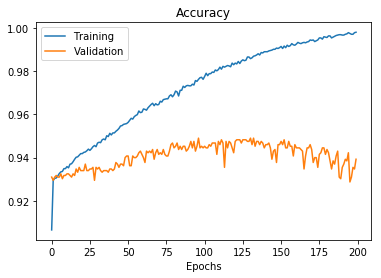

In [14]:
plt.plot(plotfit.history['acc'])
plt.plot(plotfit.history['val_acc'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.show()

In [15]:
from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [16]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

for i in range(len(loaded_model.layers)):
    layer = loaded_model.layers[i]
    # summarize output shape
    print(i, layer.name)

new_model = Model(inputs=loaded_model.inputs, outputs=loaded_model.layers[2].output)
new_model.summary()

Loaded model from disk
0 vgg16_input
1 vgg16
2 global_average_pooling2d_1
3 dense_1
4 dense_2
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16_input (InputLayer)     (None, 224, 224, 3)       0         
_________________________________________________________________
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
Total params: 14,714,688
Trainable params: 7,079,424
Non-trainable params: 7,635,264
_________________________________________________________________
